In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore,boxcox
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC,SVR
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier,AdaBoostRegressor,AdaBoostClassifier,RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,confusion_matrix,classification_report,accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler
import joblib
from pandas.api.types import is_string_dtype,is_numeric_dtype



In [99]:
#click on raw option while taking the url of a file available in github
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/aggregate_covid_country.csv")
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [100]:
df.dtypes

Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object

In [101]:
df.isin(['?']).sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [102]:
df.isin([-1]).sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [103]:
df.isin([np.NaN]).sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [104]:
df.isin([0]).sum()

Date             0
Country          0
Confirmed     8056
Recovered    11100
Deaths       12989
dtype: int64

In [105]:
#converting to date column
#df['Date']=pd.to_datetime(df['Date'],format ="%Y-%d-%m")

df['Date']=pd.to_datetime(df['Date'])
df.dtypes

Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

In [106]:
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [107]:
#df['Year'] = pd.DatetimeIndex(df['Date']).year
#df['Month'] = pd.DatetimeIndex(df['Date']).month
#df['Day'] = pd.DatetimeIndex(df['Date']).day
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['year'] = df['Date'].dt.year
df

,Date,Country,Confirmed,Recovered,Deaths,Day,Month,year
0,2020-01-22,Afghanistan,0,0,0,22,1,2020
1,2020-01-22,Albania,0,0,0,22,1,2020
2,2020-01-22,Algeria,0,0,0,22,1,2020
3,2020-01-22,Andorra,0,0,0,22,1,2020
4,2020-01-22,Angola,0,0,0,22,1,2020
...,...,...,...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3,26,5,2020
23684,2020-05-26,Western Sahara,9,6,1,26,5,2020
23685,2020-05-26,Yemen,249,10,49,26,5,2020
23686,2020-05-26,Zambia,920,336,7,26,5,2020


In [108]:
df['Date'].value_counts().shape

(126,)

In [109]:
df['Country'].value_counts().shape

(188,)

Month
1        38534
2      1671783
3      8899917
4     63046693
5    115121451
Name: Confirmed, dtype: int64


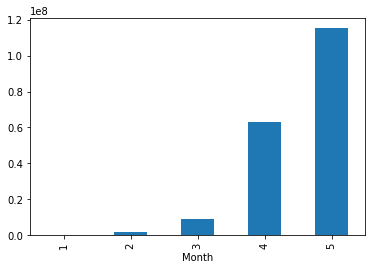

In [110]:
#Covid case gradually increasing and May month has more covid case
print(df.groupby(['Month']).sum()['Confirmed'])

df.groupby(['Month']).sum()['Confirmed'].plot.bar()

Month
1         844
2      380794
3     2706089
4    16322390
5    41747602
Name: Recovered, dtype: int64


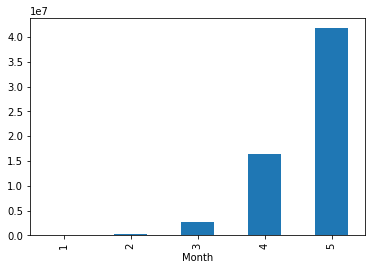

In [111]:
#May month has more Recovered
print(df.groupby(['Month']).sum()['Recovered'])

df.groupby(['Month']).sum()['Recovered'].plot.bar()

Month
1        889
2      46898
3     396863
4    4291044
5    7746343
Name: Deaths, dtype: int64


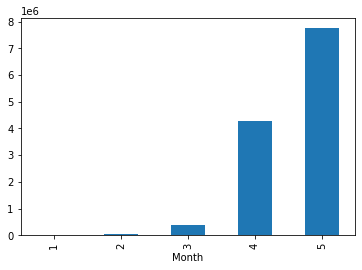

In [112]:
#Recover rate is more than death
print(df.groupby(['Month']).sum()['Deaths'])

df.groupby(['Month']).sum()['Deaths'].plot.bar()

<BarContainer object of 3 artists>

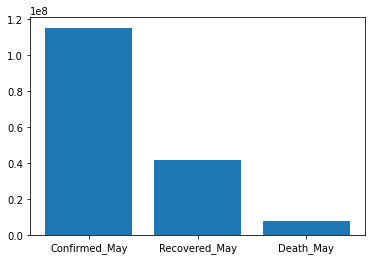

In [113]:

df_may=df.query('Month==5')

plt.bar(['Confirmed_May','Recovered_May','Death_May'],[df_may['Confirmed'].sum(),df_may['Recovered'].sum(),df_may['Deaths'].sum()])

<BarContainer object of 3 artists>

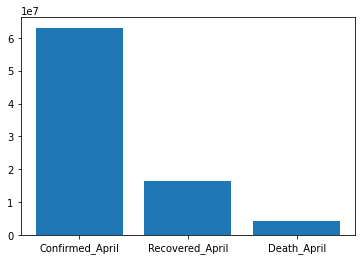

In [114]:
df_may=df.query('Month==4')

plt.bar(['Confirmed_April','Recovered_April','Death_April'],[df_may['Confirmed'].sum(),df_may['Recovered'].sum(),df_may['Deaths'].sum()])

In [ ]:
print(df['Month'].unique())
plt.plot(df['Month'].unique(), df.groupby(['Month']).sum()['Deaths'],color='red', marker='o')
plt.plot(df['Month'].unique(), df.groupby(['Month']).sum()['Recovered'],color='green', marker='o')
plt.title('Month Vs Deaths')
plt.xlabel('Month')
plt.ylabel('Death Rate')
plt.show()

In [116]:
df.dtypes

Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
Day                   int64
Month                 int64
year                  int64
dtype: object

In [117]:
df=df.drop('Date',axis=1)


#convert string datatype to numeric
for col in df.columns:
    if(is_string_dtype(df[col])):
        labelEncoder=LabelEncoder()
        df[col]=labelEncoder.fit_transform(df[col])

print(df.dtypes)

Country      int32
Confirmed    int64
Recovered    int64
Deaths       int64
Day          int64
Month        int64
year         int64
dtype: object


In [118]:
df

,Country,Confirmed,Recovered,Deaths,Day,Month,year
0,0,0,0,0,22,1,2020
1,1,0,0,0,22,1,2020
2,2,0,0,0,22,1,2020
3,3,0,0,0,22,1,2020
4,4,0,0,0,22,1,2020
...,...,...,...,...,...,...,...
23683,183,429,365,3,26,5,2020
23684,184,9,6,1,26,5,2020
23685,185,249,10,49,26,5,2020
23686,186,920,336,7,26,5,2020


In [119]:
df.isin([0]).sum()

Country        126
Confirmed     8056
Recovered    11100
Deaths       12989
Day              0
Month            0
year             0
dtype: int64

In [120]:
#replacing 0 to mean value
for col in df.columns:
    if(df[col].isin([0]).sum()>0):
        simpleImputer=SimpleImputer(missing_values=0,strategy='mean')
        simpleImputer.fit(df[[col]])
        df[col]=simpleImputer.fit_transform(df[[col]]).ravel()

In [121]:
df.isin([0]).sum()

Country      0
Confirmed    0
Recovered    0
Deaths       0
Day          0
Month        0
year         0
dtype: int64

In [122]:
df.describe()

,Country,Confirmed,Recovered,Deaths,Day,Month,year
count,23688.000000,2.368800e+04,23688.000000,23688.000000,23688.000000,23688.000000,23688.0
mean,94.000000,1.207641e+04,4858.414283,1166.654547,15.968254,3.261905,2020.0
std,53.838856,5.814028e+04,14947.759207,3950.376489,8.730660,1.242007,0.0
min,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,2020.0
25%,47.750000,8.300000e+01,75.000000,28.000000,8.000000,2.000000,2020.0
50%,94.000000,2.375000e+03,4858.414283,1166.654547,16.000000,3.000000,2020.0
75%,140.250000,1.207641e+04,4858.414283,1166.654547,24.000000,4.000000,2020.0
max,187.000000,1.680913e+06,384902.000000,98913.000000,31.000000,5.000000,2020.0


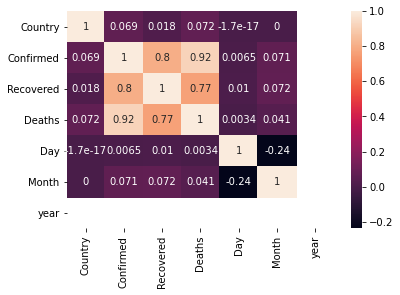

In [123]:
corr_=df.corr()
sns.heatmap(corr_,annot=True)

In [124]:
#removing year as thr is no relation with variables
df=df.drop('year',axis=1)
df

,Country,Confirmed,Recovered,Deaths,Day,Month
0,94.0,12076.405962,4858.414283,1166.654547,22,1
1,1.0,12076.405962,4858.414283,1166.654547,22,1
2,2.0,12076.405962,4858.414283,1166.654547,22,1
3,3.0,12076.405962,4858.414283,1166.654547,22,1
4,4.0,12076.405962,4858.414283,1166.654547,22,1
...,...,...,...,...,...,...
23683,183.0,429.000000,365.000000,3.000000,26,5
23684,184.0,9.000000,6.000000,1.000000,26,5
23685,185.0,249.000000,10.000000,49.000000,26,5
23686,186.0,920.000000,336.000000,7.000000,26,5


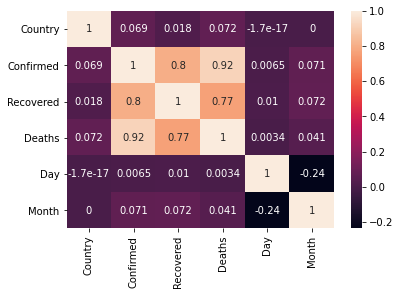

In [125]:
corr_=df.corr()
sns.heatmap(corr_,annot=True)

In [126]:
df.skew()

Country       0.000000
Confirmed    18.735104
Recovered    10.629372
Deaths       14.194877
Day          -0.068932
Month        -0.107605
dtype: float64

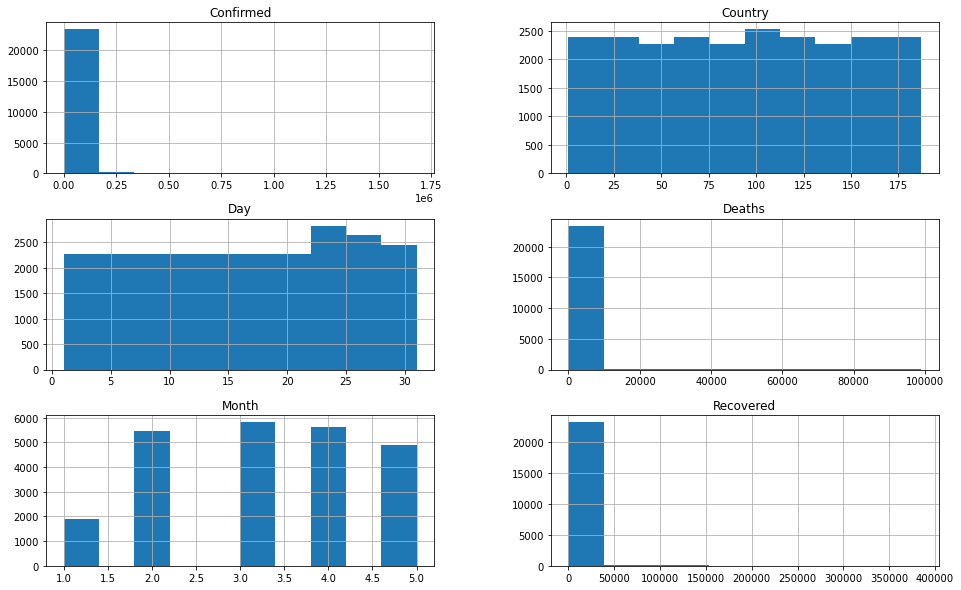

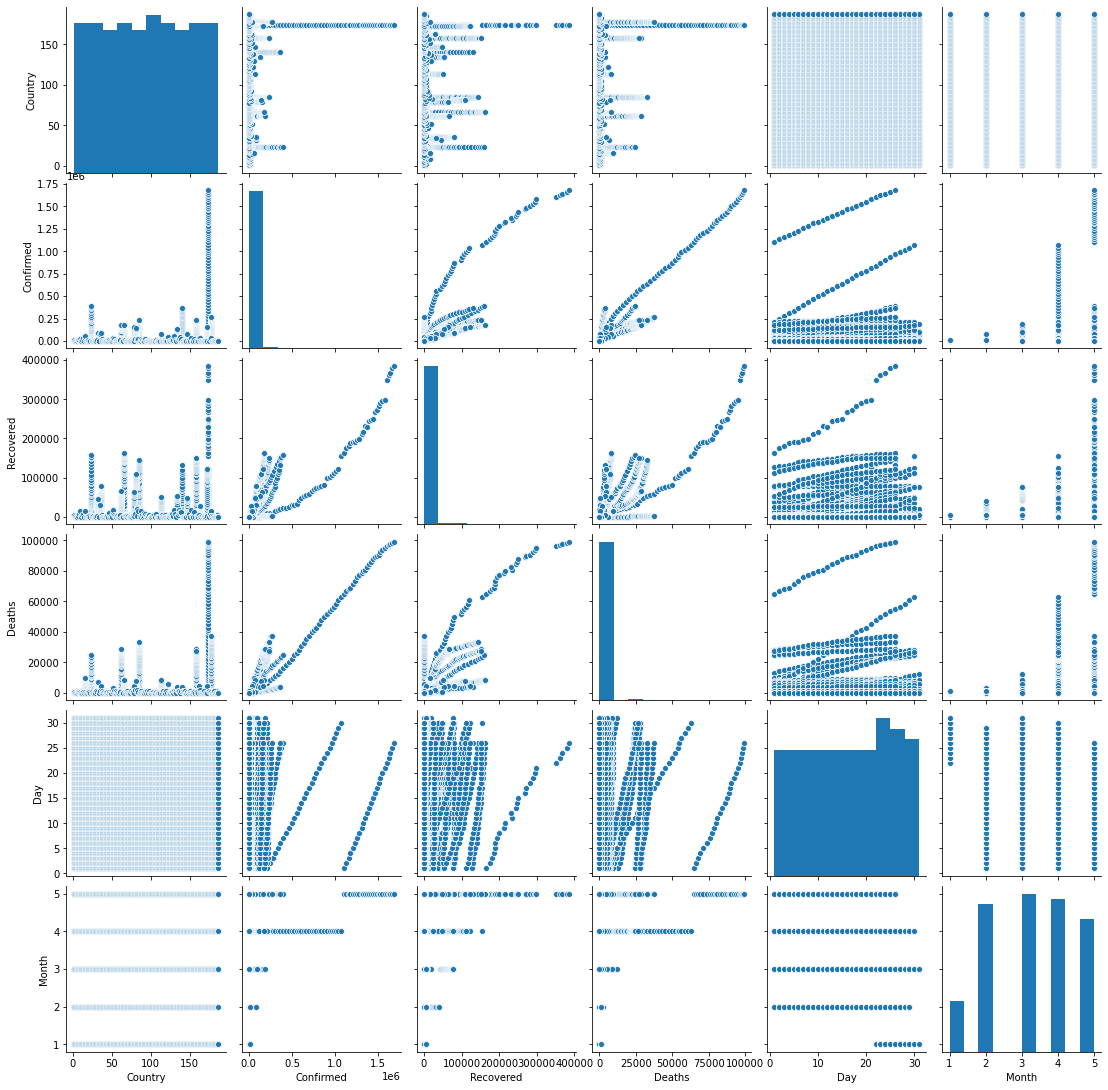

In [127]:

df.hist(figsize=(16, 10))
sns.pairplot(df)

In [128]:
#remove skewed data
for col in df.columns:
    if(df[col].skew()>0.55):
        df[col]=np.log1p(df[col])
            
    
print(df.skew())


Country      0.000000
Confirmed   -0.538689
Recovered   -0.762112
Deaths      -0.774036
Day         -0.068932
Month       -0.107605
dtype: float64


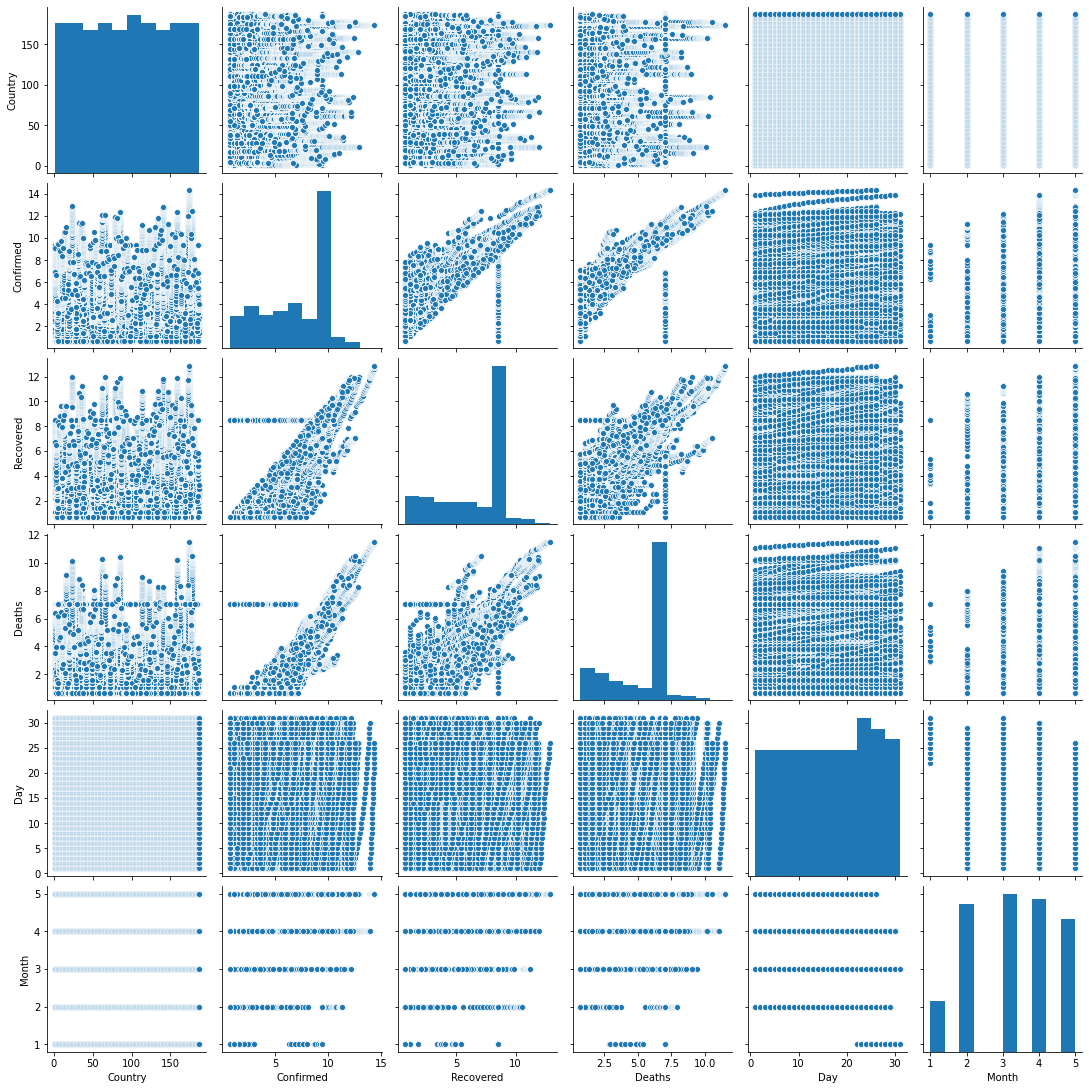

In [129]:
sns.pairplot(df)

In [130]:
df.shape

(23688, 6)

Country         AxesSubplot(0.125,0.536818;0.227941x0.343182)
Confirmed    AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Recovered    AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Deaths             AxesSubplot(0.125,0.125;0.227941x0.343182)
Day             AxesSubplot(0.398529,0.125;0.227941x0.343182)
Month           AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

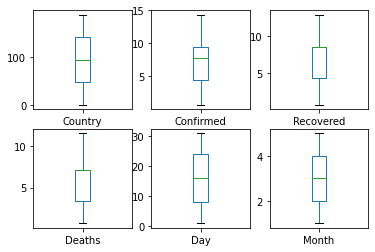

In [131]:
#check outlier
df.plot(kind='box',subplots=True,layout=(2,3))

In [132]:
#from above graph we conclude that thr is no outliers presents in data
#build model

x=df.drop(['Deaths'],axis=1)
print(x.shape)

y=df.iloc[:,-3]
print(y.shape)

#scaling X data
scaler=StandardScaler()
x=scaler.fit_transform(x)

(23688, 5)
(23688,)


In [133]:
#defining function to find best param
def findBestParam(parameters,reg_obj):
    grid_cv=GridSearchCV(reg_obj,parameters,cv=10)
    grid_cv.fit(x,y)
    return grid_cv.best_params_

In [134]:
#Finding Best parameters
#for DC classifier criterion will be giny and entrpy
print("DecisionTreeRegressor Best Param :",findBestParam({'criterion':['mse','mae']},DecisionTreeRegressor()))
print("SVR Best Param :",findBestParam({'kernel':['linear','poly','rbf']},SVR()))
print("KNeighborsReg Best Param :",findBestParam({'n_neighbors':[5,10,50,100,150]},KNeighborsRegressor()))
print("LASSO Best Param :",findBestParam({'alpha':[0.1,0.01,0.001,1.0]},Lasso()))
print("RIDGE Best Param :",findBestParam({'alpha':[0.1,0.01,0.001,1.0]},Ridge()))
print("GradientBoostingReg Best Param :",findBestParam({'learning_rate':[0.1,0.01,0.001,1.0],'n_estimators':[5,10,50,100,150]},GradientBoostingRegressor()))


#taking time
#print("AdaBoostReg Best Param :",findBestParam({'learning_rate':[0.1,0.01,0.001,1.0],'n_estimators':[5,10,50,100,150],'base_estimator':[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),RandomForestRegressor()]},AdaBoostRegressor()))
print("RandomForest Best Param :",findBestParam({'n_estimators':[5,10,50,100,150],'criterion':['mse','mae']},RandomForestRegressor()))





DecisionTreeRegressor Best Param : {'criterion': 'mae'}
SVR Best Param : {'kernel': 'rbf'}
KNeighborsReg Best Param : {'n_neighbors': 5}
LASSO Best Param : {'alpha': 0.1}
RIDGE Best Param : {'alpha': 1.0}
GradientBoostingReg Best Param : {'learning_rate': 0.1, 'n_estimators': 50}


KeyboardInterrupt: 

In [ ]:
#splitting data into train,test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
print("x_train.shape",x_train.shape,'x_test.shape',x_test.shape)
print("y_train.shape",y_train.shape,'y_test.shape',y_test.shape)

In [135]:
#Making all models and appending in a list
models=[]
models.append(('LinearRegression',LinearRegression()))
models.append(('DecisionTreeRegressor',DecisionTreeRegressor(criterion='mae')))
models.append(('SVR',SVR(kernel='rbf')))
models.append(('KNeighborsRegressor',KNeighborsRegressor(n_neighbors=5)))
models.append(('Lasso',Lasso(alpha=0.1)))
models.append(('Ridge',Ridge(alpha=1.0)))
models.append(('GradientBoostingRegressor',GradientBoostingRegressor(learning_rate=0.1,n_estimators=50)))
models.append(('AdaBoostRegressor',AdaBoostRegressor()))
models.append(('RandomForestRegressor',RandomForestRegressor(criterion='mae',n_estimators=50)))



In [136]:

#finding all metrics for all model
model_name_list=[]
cross_val_score_list=[]
r2_score_list=[]
score_list=[]
mse_list=[]
mae_list=[]


for reg_name,reg_model in models :

    reg_model.fit(x_train,y_train)
    y_pred=reg_model.predict(x_test)
    
    score_list.append(reg_model.score(x_train,y_train))
    cross_val_score_list.append(cross_val_score(reg_model,x,y,cv=10,scoring='r2').mean())
    r2_score_list.append(r2_score(y_test,y_pred))
    mse_list.append(mean_squared_error(y_test,y_pred))
    mae_list.append(mean_absolute_error(y_test,y_pred))
    model_name_list.append(reg_name)
    

In [138]:
#printing metrics
metrics_df=pd.DataFrame({'Model Name':model_name_list,'Score':score_list,'Cross Val Score':cross_val_score_list,'R2 Score':r2_score_list,'Mean Squared Error':mse_list,'Mean Absolute Error':mae_list})
metrics_df

,Model Name,Score,Cross Val Score,R2 Score,Mean Squared Error,Mean Absolute Error
0,LinearRegression,0.362145,-0.586160,0.388898,3.422311,1.340238
1,DecisionTreeRegressor,1.000000,-0.108901,0.834256,0.928206,0.209495
2,SVR,0.552203,-0.476168,0.602590,2.225588,0.794493
3,KNeighborsRegressor,0.864511,0.392788,0.792133,1.164101,0.519133
4,Lasso,0.354421,-0.324642,0.378651,3.479694,1.378058
5,Ridge,0.362145,-0.586003,0.388896,3.422322,1.340251
6,GradientBoostingRegressor,0.621561,0.319221,0.645655,1.984415,0.876047
7,AdaBoostRegressor,0.536819,-0.375752,0.553181,2.502287,1.069696
8,RandomForestRegressor,0.968363,0.552237,0.910184,0.502992,0.280336


In [141]:
reg_model=RandomForestRegressor(criterion='mae',n_estimators=50)
for r_state in range(42,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=r_state)
    reg_model.fit(x_train,y_train)
    y_pred=reg_model.predict(x_test)
    r2_sc=r2_score(y_test,y_pred)
    print("r2 score corresponding to random state : ",r_state,"   is : ",r2_sc)   
       

r2 score corresponding to random state :  42    is :  0.9052157804460554
r2 score corresponding to random state :  43    is :  0.8942615431295963
r2 score corresponding to random state :  44    is :  0.8955614033038494
r2 score corresponding to random state :  45    is :  0.9073176760069191
r2 score corresponding to random state :  46    is :  0.8954672047212713
r2 score corresponding to random state :  47    is :  0.8984997402474808
r2 score corresponding to random state :  48    is :  0.8947156744344776
r2 score corresponding to random state :  49    is :  0.8936961999179732
r2 score corresponding to random state :  50    is :  0.8982979134961244
r2 score corresponding to random state :  51    is :  0.8964597178350528
r2 score corresponding to random state :  52    is :  0.8966302916916495
r2 score corresponding to random state :  53    is :  0.8999195147468136
r2 score corresponding to random state :  54    is :  0.8963806428452732
r2 score corresponding to random state :  55    is 

KeyboardInterrupt: 

In [142]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=59)
reg_model.fit(x_train,y_train)
y_pred=reg_model.predict(x_test)
r2_sc=r2_score(y_test,y_pred)
mean_abs_error=mean_absolute_error(y_test,y_pred)
mean_sqr_error=mean_squared_error(y_test,y_pred)
print("r2_sc",r2_sc,"mean_abs_error",mean_abs_error,"mean_sqr_error",mean_sqr_error)

r2_sc 0.9138645027187398 mean_abs_error 0.28321844067119295 mean_sqr_error 0.48237825200519974


In [143]:
#GradientBoostingRegressor is performing well than rest of the model 
#store model 

joblib.dump(reg_model,'Covid19_RandomForestRegressor.pkl')

['Covid19_RandomForestRegressor.pkl']